# SVM SMOTE Analysis

This algorithm creates new samples in the dataset by utilizing interpolation and extrapolation of samples from the minority class and its closest neighbours.

---

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn import svm

from imblearn.over_sampling import SVMSMOTE

plt.style.use("dark_background")

%matplotlib inline

---

## Create Dataset

In [2]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

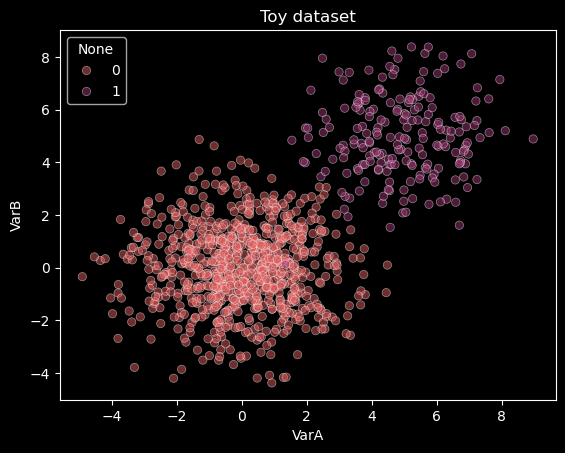

In [3]:
sns.scatterplot(
    data=X, 
    x="VarA", 
    y="VarB", 
    hue=y, 
    alpha=0.5,
    palette= "flare" 
)

plt.title('Toy dataset')
plt.show()

### Find the support vectors

In [4]:
clf = svm.SVC(kernel= "linear")

# Fit data
clf = clf.fit(X, y)

In [5]:
# Support vector indices

clf.support_

array([ 33, 114, 115, 359, 384, 445, 456, 486, 504, 750, 805, 848, 851,
       855, 856, 886, 915, 948, 975, 980])

<blockquote>These are the indices of the support vectors.</blockquote>

In [6]:
# number of support vectors

len(clf.support_)

20

In [7]:
# The support vectors

clf.support_vectors_

array([[2.3819938 , 3.06292458],
       [2.59589693, 3.04392295],
       [2.28349103, 2.29871214],
       [4.47682419, 0.09944696],
       [2.90880727, 2.02791118],
       [2.14396317, 2.6945143 ],
       [3.34672822, 1.43606064],
       [1.93081141, 2.63491957],
       [2.40794036, 2.60692174],
       [2.52740778, 2.76931077],
       [1.94512179, 3.98316159],
       [1.34402739, 0.13133529],
       [4.56088035, 1.53051079],
       [2.43163142, 3.45234939],
       [3.26371067, 1.93444272],
       [1.89137585, 4.02544607],
       [3.31707242, 2.64186186],
       [3.17266068, 2.70912186],
       [3.15163354, 2.21972273],
       [3.07674922, 2.85670548]])

<blockquote>These are the observations in our dataset that maximize the separation of the classes.

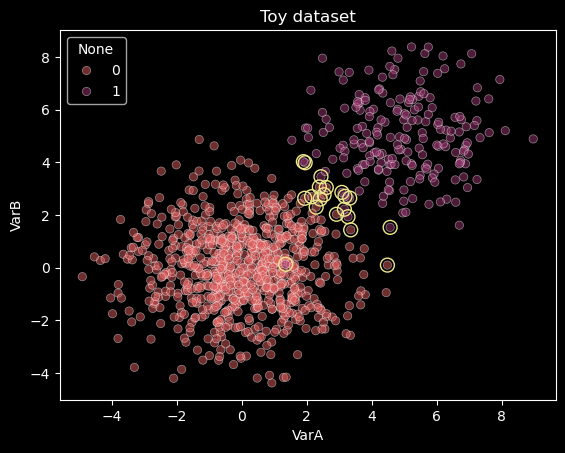

In [8]:
# mark the support vectors

sns.scatterplot(
    data = X,
    x = "VarA",
    y = "VarB",
    hue = y,
    palette= "flare",
    alpha = 0.5
)

plt.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:,1],
            s = 100,
            linewidths= 1,
            facecolors = "None",
            edgecolors= "khaki")
plt.title("Toy dataset");

<blockquote>Most support vectors are observations that are closer to the boundary. 


<br>There are also support vectors from the majority and the minority classes.</blockquote>

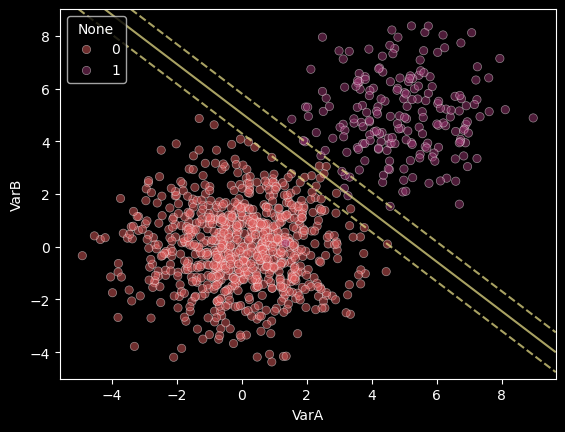

In [9]:
# plot the SVM boundaries

sns.scatterplot(
    data = X,
    x = "VarA",
    y = "VarB",
    hue = y,
    alpha = 0.5,
    palette= "flare"
)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add the SVM boundaries
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))


# decision function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)

plt.contour(
    xx,
    yy,
    Z,
    colors = "khaki",
    levels = [-1, 0, 1],
    alpha = 0.7,
    linestyles = ["--", "-", "--"]
);

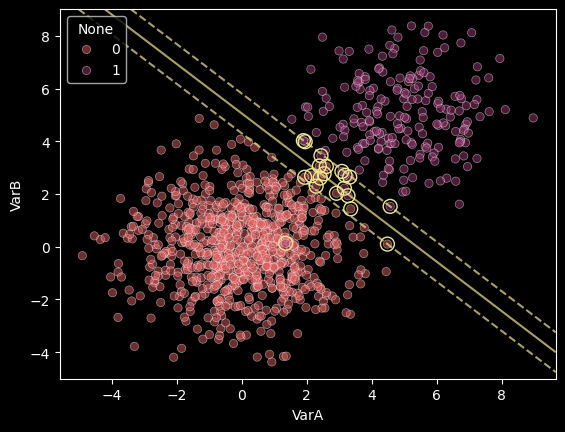

In [10]:
# plot the SVM boundaries

sns.scatterplot(
    data = X,
    x = "VarA",
    y = "VarB",
    hue = y,
    alpha = 0.5,
    palette= "flare"
)

plt.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:,1],
            s = 100,
            linewidths= 1,
            facecolors = "None",
            edgecolors= "khaki")

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add the SVM boundaries
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))


# decision function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)

plt.contour(
    xx,
    yy,
    Z,
    colors = "khaki",
    levels = [-1, 0, 1],
    alpha = 0.7,
    linestyles = ["--", "-", "--"]
);

## SVM SMOTE

In [11]:
sm = SVMSMOTE(
    sampling_strategy= "auto", # samples only the minority class
    random_state= 0,
    k_neighbors= 5, # neighbours to create synthetic samples
    m_neighbors=10, # neighbours to determine if minority class is in "danger"
    svm_estimator= svm.SVC(kernel= "linear")
)

X_res, y_res = sm.fit_resample(X, y)

<blockquote>SVM SMOTE utilizes the observations from the minority class within the danger zone as templates in order to create new samples.</blockquote>

In [12]:
# size of original dataset

X.shape, y.shape

((1000, 2), (1000,))

In [13]:
# size of over-sampled dataset

X_res.shape, y_res.shape

((1600, 2), (1600,))

In [15]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 Name: count, dtype: int64,
 0    800
 1    800
 Name: count, dtype: int64)

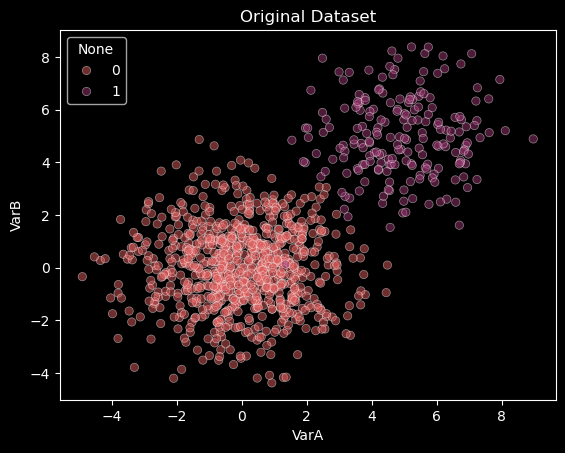

In [23]:
# plot of original dataset

sns.scatterplot(
    data = X,
    x = "VarA",
    y= "VarB",
    hue = y,
    alpha = 0.5,
    palette= "flare"
)

plt.title("Original Dataset")
plt.show()

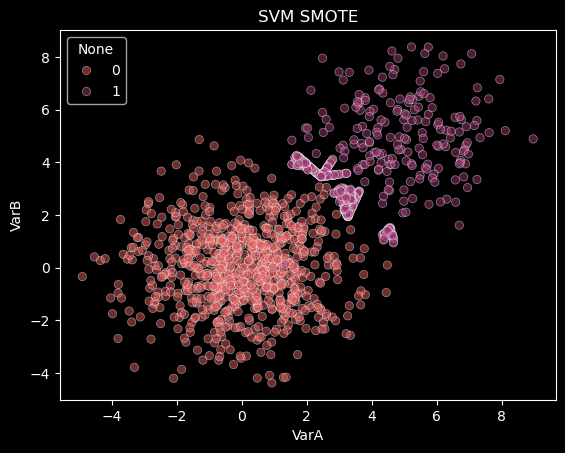

In [24]:
# plot of over-sampled dataset

sns.scatterplot(
    data = X_res,
    x = "VarA",
    y = "VarB",
    hue = y_res,
    alpha = 0.5,
    palette= "flare"
)

plt.title("SVM SMOTE")
plt.show()

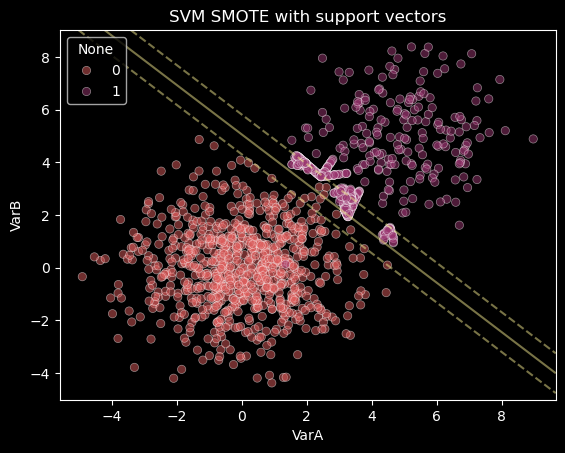

In [25]:
sns.scatterplot(
    data = X_res,
    x = "VarA",
    y = "VarB",
    hue = y_res,
    alpha = 0.5,
    palette= "flare"
)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Add decision boundaries
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0],ylim[1], 50))

# decision function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)

plt.contour(xx, 
            yy,
            Z, 
            colors = "khaki",
            levels = [-1,0, 1],
            alpha = 0.5,
            linestyles = ["--", "-","--"]
)

plt.title("SVM SMOTE with support vectors")
plt.show()

<blockquote>Most of the synthetic examples were created closer to the support vectors from the minority class, within the decision boundary from the SVM.<blockquote>

---